In [3]:
%load_ext autoreload
%autoreload 2

In [361]:
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import display
from PIL import Image
from omegaconf import OmegaConf

import albumentations as A
import torch
import torch.nn as nn
import torchvision

from lowpolypy.utils import load_config
from lowpolypy import layers

### The 3-part Lowpolyfication System

- **Point Generation**: Given an image, generate a set of points
- **Polygon Generation**: Given an image and a set of points, generate a set of polygons
- **Shading**: Given an image and a set of polygons, shade the image to get a low-poly image

The cell below defines the base classes for each of these components

In [8]:
# %%prun -l 30
config = load_config("../lowpolypy/config.yaml")
config.files.source = "../images/bird1.jpg"
config

{'files': {'source': '../images/bird1.jpg', 'destination': None, 'recursive': False, 'image_extensions': ['.jpg', '.jpeg', '.png', '.bmp']}, 'pipeline': {'ConvPoints': {'num_points': 5000, 'num_filler_points': 5000, 'weight_filler_points': True}, 'DelaunayTriangulator': {}, 'KmeansShader': {}}, '-f': None, '/home/krishna/': {'local/share/jupyter/runtime/kernel-4429e239-4021-4d6b-a86d-208aa4ee6fcd': {'json': None}}}

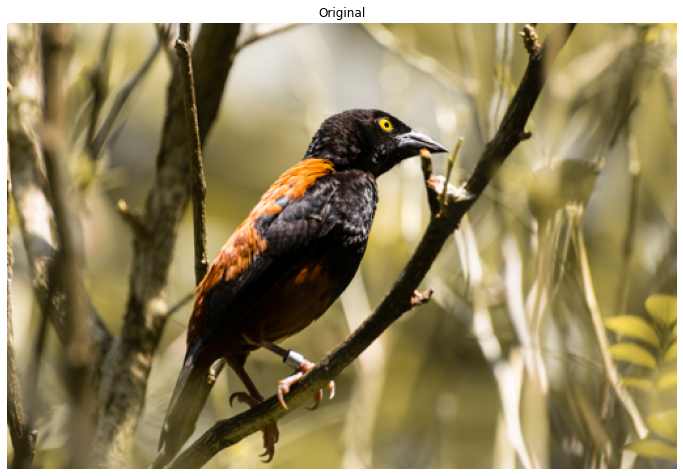

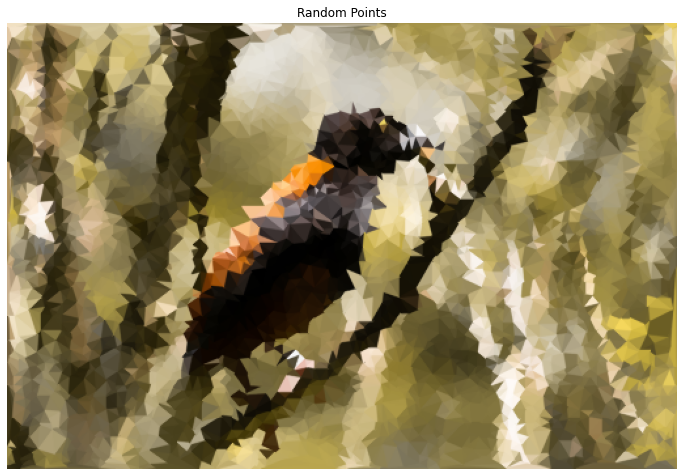

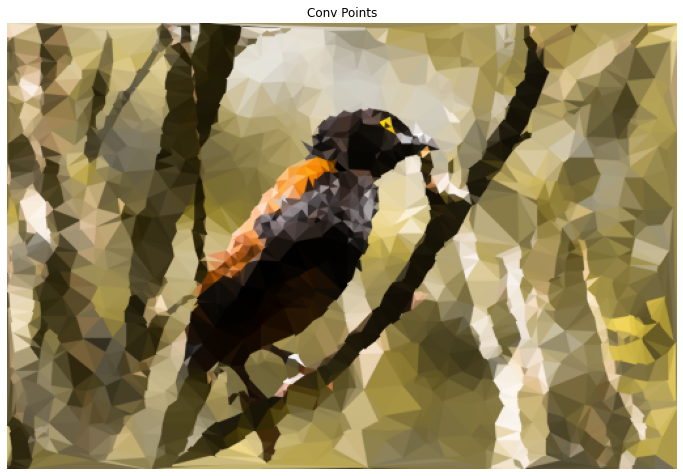

In [360]:
IMAGE_PATH = "../images/bird1.jpg"
image = Image.open(IMAGE_PATH)
image.thumbnail((512, 512))

plt.figure(figsize=(12, 12))
plt.title("Original")
plt.imshow(image)
plt.axis("off")
plt.show()

random_point_generator = RandomPoints(num_points=5000)
conv_point_generator = ConvPoints(num_points=2500, num_filler_points=500)
delaunay_triangulator = DelaunayTriangulator()
kmeans_shader = KmeansShader()

random_points = random_point_generator(image)
conv_points = conv_point_generator(image)

polygons = delaunay_triangulator(image, random_points)
shaded = kmeans_shader(image, random_points, polygons)
plt.figure(figsize=(12, 12))
plt.title("Random Points")
plt.imshow(shaded)
plt.axis("off")
plt.show()

polygons = delaunay_triangulator(image, conv_points)
shaded = kmeans_shader(image, conv_points, polygons)
plt.figure(figsize=(12, 12))
plt.title("Conv Points")
plt.imshow(shaded)
plt.axis("off")
plt.show()